Shortcut          | Significado   
------------------|----------------
**CTRL + Enter**  | ejecutar celta 
**SHIFT + Enter** | ejecutar celda y pasar a siguiente
**ALT + Enter**   | ejecutar celda y crear una debajo

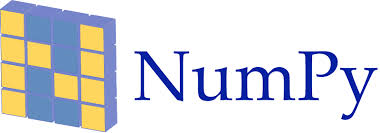

---
# NumPy III - secciones de arrays

**Objetivos**:

* Entender particularidades a tener en cuenta al acceder a elementos de un array, sea 1D o 2D
* Conocer otros tipos de indexación más versátiles
* Broadcasting
---
## Arrays de una dimensión

In [3]:
import numpy as np

arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
arr[0]  # Accediendo al primer elemento

0

In [6]:
arr[-1]  # Accediendo al último

9

##### __¡Atención!__ 

NumPy devuelve __vistas__ de la sección, no __copias__. Esto quiere decir que se debe prestar mucha atención a este comportamiento:

In [13]:
arr = np.arange(10)
a = arr[5:]

print(arr)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9]


In [14]:
arr[5] = 999

print(arr)
print(a)

[  0   1   2   3   4 999   6   7   8   9]
[999   6   7   8   9]


Modificando la variable `arr` se modifica la variable `a` **también**. Lo mismo ocurre al revés, modificando `a` primero:

In [15]:
arr = np.arange(10)
a = arr[5:]

print(arr)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9]


In [16]:
a[-1] = 999

print(arr)
print(a)
print(id(arr), id(a))

[  0   1   2   3   4   5   6   7   8 999]
[  5   6   7   8 999]
135663488 135661808


**Explicación:** la variable `a` apunta a las direcciones de memoria donde están almacenados los elementos del array `arr` seleccionados (seccionados), no copia sus valores, a menos que explícitamente se haga:

In [17]:
arr = np.arange(10)
a = arr[5:].copy()

print(arr)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9]


In [12]:
arr[5] = 999

print(arr)
print(a)

[  0   1   2   3   4 999   6   7   8   9]
[5 6 7 8 9]


Mediante `.copy()` ambas variables quedan desvinculadas.

## Arrays de dos dimensiones

In [13]:
arr = np.arange(9).reshape([3, 3])  # Array de 9 elementos reordenado en matrix 3x3
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [14]:
arr[0, -1]

2

In [15]:
arr[2, 2]

8

### Secciones de arrays

La potencia de NumPy está en poder acceder a secciones enteras. Para ello se usa la sintaxis `inicio:final:paso`. Si alguno de estos valores no se especifica, toma un valor por defecto. Ejemplos:

In [16]:
M = np.arange(36, dtype=float).reshape(4, 9)  # Array de 36 elementos reordenado en matrix 4x9
M

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23., 24., 25., 26.],
       [27., 28., 29., 30., 31., 32., 33., 34., 35.]])

In [17]:
M[1:3]  # Indexado de la segunda a la tercera fila, incluida

array([[ 9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23., 24., 25., 26.]])

In [18]:
M[:2, 1:5:2]  # Hasta la tercera fila (sin incluir) y de la segunda a la sexta columna (sin incluir) con saltos de dos en dos

array([[ 1.,  3.],
       [10., 12.]])

##### Ejercicio

Pintar un tablero de ajedrez usando la función `plt.matshow`.

In [19]:
tablero = np.zeros([8, 8], dtype=int)

tablero[0::2, 1::2] = 1
tablero[1::2, 0::2] = 1

tablero

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

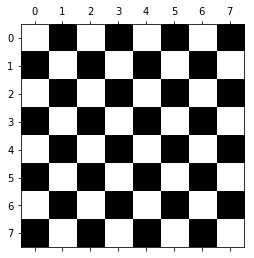

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(tablero, cmap=plt.cm.gray_r)

## Accediendo con máscaras

En muchas ocasiones es necesario acceder a los elementos de un array donde se cumpla una determinada condición. En estos casos, se puede primero evaluar la condición y obtener un array de booleanos que indique dónde se cumple y dónde no. Luego, utilizar este array para acceder a los elementos del array.

In [21]:
arr = np.arange(36, dtype=float)
arr

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [22]:
mask = arr > 25 # Máscara para los mayores de 25
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [23]:
arr[mask]

array([26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

El array _máscara_ `mask` mantiene las mismas dimensiones que el array inicial, no así el array que resulta de _enmascarar_.

In [24]:
mask2 = (arr % 2 == 0)  # Máscara para los pares
mask2

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False])

In [25]:
arr[mask2]

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34.])

## Fancy indexing 

Se ha accedido a los elementos del array indicando en qué posición se encuentran, pero ¿qué ocurre si es preciso acceder a muchos elementos a la vez indicando su posición y no es posible hacerlo con una simple sección?

En tal caso se puede pasar dos listas de posiciones: una para las filas y otra para las columnas.

In [26]:
M = np.arange(36, dtype=float).reshape(4, 9)  # Array de 36 elementos reordenado en matrix 4x9
M

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23., 24., 25., 26.],
       [27., 28., 29., 30., 31., 32., 33., 34., 35.]])

In [27]:
row_index = [0, 1, 1]
col_index = [0, 4, 0]

M[row_index, col_index]

array([ 0., 13.,  9.])

##### sentencia [`where`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)

In [28]:
rows_and_cols = np.where((M % 2 == 0) & (M > 10))  # Evaluar con where la posición de los elementos pares mayores que 10
rows_and_cols

(array([1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3], dtype=int64),
 array([3, 5, 7, 0, 2, 4, 6, 8, 1, 3, 5, 7], dtype=int64))

In [29]:
M[rows_and_cols]  # Aplicar el indexado

array([12., 14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34.])

<div class="alert alert-info">**ATENCIÓN**: indexar un array con _fancy indexing_ no devuelve una vista, sino una copia: https://docs.scipy.org/doc/numpy-1.12.0/user/basics.indexing.html</div>

## Broadcasting 

Hasta ahora para operar arrays ha sido que las formas de los arrays fuesen iguales (o compatibles en el caso de las operaciones de Álgebra lineal). No obstante, NumPy cuenta con una característica llamada [**broadcasting**](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) que permite operar dos arrays con formas compatibles.

Sea la siguiente operación:

$$\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix} + \begin{pmatrix} 2 & 3 & -1 \\ 2 & 3 & -1 \\ 2 & 3 & -1 \end{pmatrix}$$

Una opción sería crear las dos matrices directamente (ojo a la nueva función `tile`):

In [30]:
A = np.arange(1, 10).reshape(3,3)
B = np.tile(np.array([2, 3, -1]), (3, 1))
print(A, '\n')
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[ 2  3 -1]
 [ 2  3 -1]
 [ 2  3 -1]]


In [31]:
A + B

array([[ 3,  5,  2],
       [ 6,  8,  5],
       [ 9, 11,  8]])

Aunque la función `tile` pueda ahorrar algo de trabajo,  sigue siendo algo incómodo. En esta ocasión el _broadcasting_ puede ser útil:

In [32]:
A + np.array([2, 3, -1])

array([[ 3,  5,  2],
       [ 6,  8,  5],
       [ 9, 11,  8]])

A cada fila de `A` se le suma el array fila. Si este fuese una columna en lugar de una fila, se sumará a las columnas de `A`:

In [33]:
A + np.array([[2], [3], [-1]])

array([[3, 4, 5],
       [7, 8, 9],
       [6, 7, 8]])

Y el concepto puede llevarse al extremo sumando un vector fila con uno columna:

In [34]:
np.array([2, 3, -1]) + np.array([2, 3, -1]).reshape(-1, 1)

array([[ 4,  5,  1],
       [ 5,  6,  2],
       [ 1,  2, -2]])

En realidad, ya se ha hecho uso de este concepto al hacer cosas como:

In [35]:
A + 5

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

Donde a cada elemento del array `A` se le ha sumado 5.

---
___Se ha visto:___

* A acceder a elementos de un array:
  - índices para acceder a elementos sueltos
  - secciones (que devuelven vistas) para acceder a subarrays
  - máscaras basadas en condiciones
  -fancy indexing (que devuelve vistas)

* Como el bradcasting ayuda a realizar operaciones de forma más cómoda
---
[@AeroPython](https://github.com/aeropython): Juan Luis Cano, José Luis Cercos, Mabel Delgado, Alejandro Sáez, Andrés Quezada